In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")

## Book DataSet

In [4]:
book= pd.read_csv('Books.csv')

### Information of data set

In [5]:
#droping the Image columns which is not Required in EDA
book.drop(['Image-URL-S', 'Image-URL-L'],axis=1,inplace=True)

In [6]:
book.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher', 'Image-URL-M':'image-m'}, inplace=True)

In [7]:
book.loc[book.ISBN == '0789466953','year'] = 2000
book.loc[book.ISBN == '0789466953','author'] = "James Buckley"
book.loc[book.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
book.loc[book.ISBN == '0789466953','title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [8]:
book.loc[book.ISBN == '078946697X','year'] = 2000
book.loc[book.ISBN == '078946697X','author'] = "Michael Teitelbaum"
book.loc[book.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
book.loc[book.ISBN == '078946697X','title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [9]:
book.loc[(book.ISBN == '0789466953') | (book.ISBN == '078946697X'),:]

,ISBN,title,author,year,publisher,image-m
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [10]:
book.loc[book['year'] == 'Gallimard',:]

,ISBN,title,author,year,publisher,image-m
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...


In [11]:
book.loc[book.ISBN == '2070426769','year'] = 2003
book.loc[book.ISBN == '2070426769','author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
book.loc[book.ISBN == '2070426769','publisher'] = "Gallimard"
book.loc[book.ISBN == '2070426769','title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [12]:
book.loc[book.ISBN == '2070426769',:]

,ISBN,title,author,year,publisher,image-m
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [13]:
book['year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [14]:
book['year'].describe()

count     271360
unique       200
top         2002
freq       13903
Name: year, dtype: int64

In [15]:
print(book.loc[book.year == '1376',:])
print(book.loc[book.year == '1378',:])
print(book.loc[book.year == '1806',:])
print(book.loc[book.year == '1897',:])

              ISBN         title          author  year       publisher  \
253750  964442011X  Tasht-i khun  IsmaÂ°il Fasih  1376  Nashr-i Alburz   

                                                  image-m  
253750  http://images.amazon.com/images/P/964442011X.0...  
              ISBN                             title       author  year  \
227531  9643112136  Dalan-i bihisht (Dastan-i Irani)  Nazi Safavi  1378   

                  publisher                                            image-m  
227531  Intisharat-i Quqnus  http://images.amazon.com/images/P/9643112136.0...  
Empty DataFrame
Columns: [ISBN, title, author, year, publisher, image-m]
Index: []
              ISBN                                              title  \
245607  0781268001  Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...   

                     author  year              publisher  \
245607  Silas Weir Mitchell  1897  Reprint Services Corp   

                                                  image-m  
245607 

In [16]:
book.year=pd.to_numeric(book.year, errors='coerce')

In [17]:
book.loc[(book['year'] > 2022) | (book.year == 0),'year'] = np.NAN

In [18]:
book.year.fillna(round(book.year.max()), inplace=True)

In [19]:
book.loc[(book['year'] < 1897) | (book.year == 0),'year'] = np.NAN
book = book.dropna(subset=['year'])
book.year.isnull().sum()

0

In [20]:
print(sorted(book['year'].unique()))

[1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2008.0, 2010.0, 2011.0, 2012.0, 2020.0, 2021.0]


In [21]:
book.loc[(book.ISBN == '193169656X'),'publisher'] = 'other'
book.loc[(book.ISBN == '1931696993'),'publisher'] = 'other'

In [22]:
book.loc[(book.publisher == 'Edinburgh Financial Publishing'),:]

,ISBN,title,author,year,publisher,image-m
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...


## Users Dataset

In [23]:
user=pd.read_csv('Users.csv')

In [24]:
user.rename(columns = {'User-ID':'userid', 'Location':'location', 'Age':'age'}, inplace=True)

In [25]:
user['location'] = user['location'].apply(lambda row: str(row).split(',')[-1])
user['location'].value_counts().to_frame().head(10)

,location
usa,139711
canada,21658
united kingdom,18538
germany,17043
spain,13147
australia,11784
italy,11266
,4578
france,3455
portugal,3325


In [26]:
user

,userid,location,age
0,1,usa,NaN
1,2,usa,18.0
2,3,russia,NaN
3,4,portugal,17.0
4,5,united kingdom,NaN
...,...,...,...
278853,278854,usa,NaN
278854,278855,united kingdom,50.0
278855,278856,canada,NaN
278856,278857,usa,NaN


In [27]:
user['location'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

In [28]:
user.loc[(user.age > 85) | (user.age < 10), 'age'] = np.nan

<AxesSubplot:>

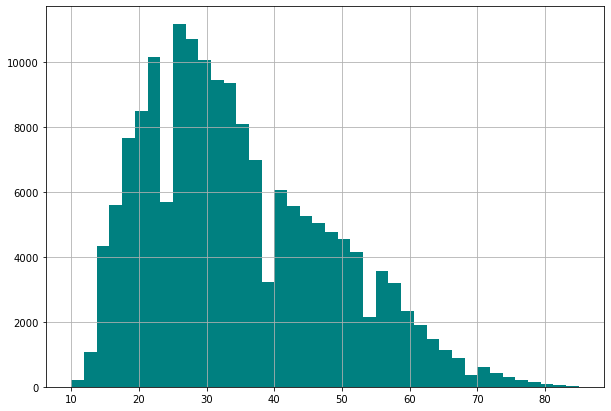

In [29]:
plt.figure(figsize=(10, 7))
user.age.hist(bins=40, color='teal')

In [30]:
user.age = user.age.fillna(user.age.mean())

In [31]:
user.age = user.age.astype(np.int32)

In [32]:
user['age'].isnull().sum()

0

## Rating Dataset

In [33]:
rating=pd.read_csv('Ratings.csv')

In [34]:
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [35]:
rating.rename(columns = {'User-ID':'userid', 'Book-Rating':'bookrating'}, inplace=True)

## Collaborative Filtering Based Recommender System

In [36]:
ratings_merged=rating.merge(book,on='ISBN')
ratings_merged = ratings_merged.merge(user,on='userid')

ratings_merged.head(2)

,userid,ISBN,bookrating,title,author,year,publisher,image-m,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa,34
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,usa,23


In [38]:
x=ratings_merged.groupby('userid').count()['bookrating']>100            # userid with rating >100
user_rated=x[x].index      # # userid with rating >100

rated_filter=ratings_merged[ratings_merged['userid'].isin(user_rated)]

y=rated_filter.groupby('title').count()['bookrating']>50               # books with rating given by more than 50 users
rated_books=y[y].index

In [39]:
final_ratings= rated_filter[rated_filter['title'].isin(rated_books)]
final_ratings

,userid,ISBN,bookrating,title,author,year,publisher,image-m,location,age
38,6543,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,usa,34
39,6543,0385504209,0,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,usa,34
40,6543,0971880107,0,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,usa,34
41,6543,0312966970,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999.0,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312966970.0...,usa,34
43,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001.0,Warner Vision,http://images.amazon.com/images/P/0446605484.0...,usa,34
...,...,...,...,...,...,...,...,...,...,...
908968,155463,0425074986,0,"Dune Messiah (Dune Chronicles, Book 2)",Frank Herbert,1984.0,Penguin Putnam~mass,http://images.amazon.com/images/P/0425074986.0...,usa,38
910281,148966,0425148297,5,Naked in Death,J. D. Robb,2004.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425148297.0...,usa,35
919658,86947,080523747X,10,Masquerade,Kit Williams,1984.0,Schocken Books,http://images.amazon.com/images/P/080523747X.0...,usa,71
935415,240543,0385424728,6,The Chamber,John Grisham,1994.0,Doubleday Books,http://images.amazon.com/images/P/0385424728.0...,usa,67


In [40]:
books_table=final_ratings.pivot_table(index='title',columns='userid',values='bookrating')

books_table.fillna(0,inplace=True)
books_table

userid,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(books_table.values)
distances, indices = knn.kneighbors(books_table.values, n_neighbors=5, return_distance=True)

In [42]:
def recommendation(userid):
    sorted_df = books_table.sort_values(by=userid,ascending=False)   # sort the pivot table as per user id
    book_name = sorted_df[userid].index[0]                           # get the book name for which user has given highest raitng

    index_user_likes = books_table.index.tolist().index(book_name)   # get an index for a book_name in original pivot table books_table
    sim_books = indices[index_user_likes].tolist()                   # list of indices of similar books -- used KNN
    book_distances = distances[index_user_likes].tolist()            # the list for distances of similar books from book_name
    print('Similar Books to '+str(books_table.index[index_user_likes])+': \n')    
    
    for i in sim_books:
        print(str(books_table.index[i]))

In [43]:
recommendation(11676)

Similar Books to The Poisonwood Bible: 

The Poisonwood Bible
The Midnight Club
Prodigal Summer
Darkness
Kiss the Girls


In [148]:
abc  = ratings_merged[ratings_merged['userid']==11676]
ls = ["The Poisonwood Bible","The Midnight Club","Prodigal Summer","Darkness","Kiss the Girls"]    
      
for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==11676]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==11676]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

The Poisonwood Bible : True
10
The Midnight Club : True
8
Prodigal Summer : True
10
Darkness : True
10
Kiss the Girls : True
9


In [145]:
recommendation(254)

Similar Books to American Gods: 

American Gods
Coraline
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
The Amber Spyglass (His Dark Materials, Book 3)
Artemis Fowl (Artemis Fowl, Book 1)


In [146]:
ls = ["American Gods","Coraline","Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death",
      "The Amber Spyglass (His Dark Materials, Book 3)","Artemis Fowl (Artemis Fowl, Book 1)"]

abc  = final_ratings[final_ratings['userid']==254]
for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==254]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==254]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

American Gods : True
10
Coraline : True
0
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death : False
The Amber Spyglass (His Dark Materials, Book 3) : True
0
Artemis Fowl (Artemis Fowl, Book 1) : False


In [149]:
recommendation(2766)

Similar Books to To Kill a Mockingbird: 

To Kill a Mockingbird
Snow Falling on Cedars
The Catcher in the Rye
Five Quarters of the Orange
The Bean Trees


In [150]:
abc  = ratings_merged[ratings_merged['userid']==2766]

for i in ["To Kill a Mockingbird","Snow Falling on Cedars","The Catcher in the Rye","Five Quarters of the Orange",
          "The Bean Trees"]:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==2766]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==2766]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

To Kill a Mockingbird : True
10
Snow Falling on Cedars : True
0
The Catcher in the Rye : False
Five Quarters of the Orange : True
8
The Bean Trees : False


In [151]:
recommendation(2276)

Similar Books to The Jury: 

The Jury
Chosen Prey
2nd Chance
Nothing Lasts Forever
Dust to Dust


In [152]:
abc  = ratings_merged[ratings_merged['userid']==2276]
ls = ["The Jury","Chosen Prey","2nd Chance","Nothing Lasts Forever","Dust to Dust"]
      
for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==2276]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==2276]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

The Jury : True
10
Chosen Prey : False
2nd Chance : True
10
Nothing Lasts Forever : False
Dust to Dust : True
9


In [153]:
recommendation(507)

Similar Books to The Secret Life of Bees: 

The Secret Life of Bees
The No. 1 Ladies' Detective Agency
Good in Bed
Wicked: The Life and Times of the Wicked Witch of the West
Girl in Hyacinth Blue


In [154]:
ls = ["The Secret Life of Bees","The No. 1 Ladies' Detective Agency","Good in Bed","Wicked: The Life and Times of the Wicked Witch of the West",
      "Girl in Hyacinth Blue"]

abc  = final_ratings[final_ratings['userid']==507]
for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==507]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==507]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

The Secret Life of Bees : True
10
The No. 1 Ladies' Detective Agency : False
Good in Bed : False
Wicked: The Life and Times of the Wicked Witch of the West : False
Girl in Hyacinth Blue : True
0


In [155]:
recommendation(882)

Similar Books to The Smoke Jumper: 

The Smoke Jumper
The Loop
Forever... : A Novel of Good and Evil, Love and Hope
The Summerhouse
Shogun


In [156]:
abc  = ratings_merged[ratings_merged['userid']==882]
ls = ["The Smoke Jumper","The Loop",
      "Forever... : A Novel of Good and Evil, Love and Hope",
      "The Summerhouse","Shogun"]
      
for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==882]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==882]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

The Smoke Jumper : True
10
The Loop : False
Forever... : A Novel of Good and Evil, Love and Hope : True
4
The Summerhouse : False
Shogun : False


In [157]:
recommendation(1424)

Similar Books to A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail): 

A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail)
Notes from a Small Island
Quentins
Seabiscuit: An American Legend
Digital Fortress : A Thriller


In [158]:
abc  = ratings_merged[ratings_merged['userid']==1424]
ls = ["A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail)",
      "Notes from a Small Island","Quentins",
      "Seabiscuit: An American Legend","Digital Fortress : A Thriller"]
      
for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==1424]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==1424]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail) : True
8
Notes from a Small Island : False
Quentins : False
Seabiscuit: An American Legend : False
Digital Fortress : A Thriller : False


In [159]:
recommendation(1733)

Similar Books to The Surgeon: 

The Surgeon
The Mulberry Tree
Faking It
Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)
Forever... : A Novel of Good and Evil, Love and Hope


In [160]:
abc  = ratings_merged[ratings_merged['userid']==1733]
ls = ["The Surgeon","The Mulberry Tree","Faking It","Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)",
      "Forever... : A Novel of Good and Evil, Love and Hope"]
      
for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==1733]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==1733]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

The Surgeon : True
10
The Mulberry Tree : False
Faking It : True
5
Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel) : False
Forever... : A Novel of Good and Evil, Love and Hope : False


In [161]:
recommendation(2033)

Similar Books to Charlie and the Chocolate Factory: 

Charlie and the Chocolate Factory
Harry Potter and the Prisoner of Azkaban (Book 3)
Matilda
Harry Potter and the Chamber of Secrets (Book 2)
Charlotte's Web (Trophy Newbery)


In [162]:
abc  = ratings_merged[ratings_merged['userid']==2033]
ls = ["Charlie and the Chocolate Factory","Harry Potter and the Prisoner of Azkaban (Book 3)",
      "Matilda","Harry Potter and the Chamber of Secrets (Book 2)","Charlotte's Web (Trophy Newbery)"]
      
for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==2033]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==2033]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

Charlie and the Chocolate Factory : True
10
Harry Potter and the Prisoner of Azkaban (Book 3) : True
9
Matilda : False
Harry Potter and the Chamber of Secrets (Book 2) : True
9
Charlotte's Web (Trophy Newbery) : False


In [163]:
recommendation(276463)

Similar Books to The Two Towers (The Lord of the Rings, Part 2): 

The Two Towers (The Lord of the Rings, Part 2)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Return of the King (The Lord of the Rings, Part 3)
The Hobbit : The Enchanting Prelude to The Lord of the Rings
Stranger in a Strange Land (Remembering Tomorrow)


In [164]:
abc  = ratings_merged[ratings_merged['userid']==276463]
ls = ["The Two Towers (The Lord of the Rings, Part 2)","The Fellowship of the Ring (The Lord of the Rings, Part 1)",
      "The Return of the King (The Lord of the Rings, Part 3)","The Hobbit : The Enchanting Prelude to The Lord of the Rings",
      "Stranger in a Strange Land (Remembering Tomorrow)"]
for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==276463]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==276463]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

The Two Towers (The Lord of the Rings, Part 2) : True
10
The Fellowship of the Ring (The Lord of the Rings, Part 1) : True
0
The Return of the King (The Lord of the Rings, Part 3) : True
0
The Hobbit : The Enchanting Prelude to The Lord of the Rings : False
Stranger in a Strange Land (Remembering Tomorrow) : False


In [165]:
recommendation(2110)

Similar Books to Sword of Shannara: 

Sword of Shannara
Fatal Cure
American Gods
Darkfall
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


In [166]:
abc  = ratings_merged[ratings_merged['userid']==2110]
ls = ["TSword of Shannara","Fatal Cure","American Gods","Darkfall",
      "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]

for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==2110]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==2110]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

TSword of Shannara : False
Fatal Cure : False
American Gods : False
Darkfall : False
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) : True
10


In [167]:
recommendation(277427)

Similar Books to Politically Correct Bedtime Stories: Modern Tales for Our Life and Times: 

Politically Correct Bedtime Stories: Modern Tales for Our Life and Times
Don't Stand Too Close to a Naked Man
My Side of the Mountain
24 Hours
Lucky : A Memoir


In [168]:
abc  = ratings_merged[ratings_merged['userid']==277427]
ls = ["Politically Correct Bedtime Stories: Modern Tales for Our Life and Times","Don't Stand Too Close to a Naked Man",
      "My Side of the Mountain","24 Hours","Lucky : A Memoir"]

for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==277427]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==277427]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

Politically Correct Bedtime Stories: Modern Tales for Our Life and Times : True
10
Don't Stand Too Close to a Naked Man : False
My Side of the Mountain : False
24 Hours : True
10
Lucky : A Memoir : True
0


In [171]:
recommendation(275970)

Similar Books to 84 Charing Cross Road: 

84 Charing Cross Road
Notes from a Small Island
To the Lighthouse
Fingersmith
Under the Tuscan Sun


In [172]:
abc  = ratings_merged[ratings_merged['userid']==275970]
ls = ["84 Charing Cross Road","Notes from a Small Island","To the Lighthouse",
      "Fingersmith","Under the Tuscan Sun"]
      
for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==275970]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==275970]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

84 Charing Cross Road : True
10
Notes from a Small Island : False
To the Lighthouse : True
10
Fingersmith : True
0
Under the Tuscan Sun : False


In [173]:
recommendation(275020)

Similar Books to Smilla's Sense of Snow: 

Smilla's Sense of Snow
Harvest
Critical Judgment
All the Pretty Horses (The Border Trilogy, Vol 1)
Slow Waltz in Cedar Bend


In [174]:
abc  = ratings_merged[ratings_merged['userid']==275020]
ls = ["Smilla's Sense of Snow","Harvest","Critical Judgment",
      "All the Pretty Horses (The Border Trilogy, Vol 1)","Slow Waltz in Cedar Bend"]      
for i in ls:
    print(i,':', i in list(ratings_merged[ratings_merged['userid']==275020]['title'].values))
    if (i in list(ratings_merged[ratings_merged['userid']==275020]['title'].values))== True:
        print( abc[abc['title']== i]['bookrating'].values[0])

Smilla's Sense of Snow : True
10
Harvest : False
Critical Judgment : False
All the Pretty Horses (The Border Trilogy, Vol 1) : False
Slow Waltz in Cedar Bend : False
